## Data Exploration

The [CommonLit Readability Prize](https://www.kaggle.com/c/commonlitreadabilityprize/overview) competition involves determining the reading level of a passage of text.
From the competition:

> Reading is an essential skill for academic success. When students have access to engaging passages offering the right level of challenge, they naturally develop reading skills.

This notebook is an exploration of the dataset.
We briefly look at the training set, the test set, and a sample submission.

---

### Download the Data

To begin with we actually need the data.
So lets download it:

In [5]:
! cd .. ; make data

make[1]: Entering directory '/home/matthew/Programming/Python/kaggle-readability'
make[1]: Nothing to be done for 'data'.
make[1]: Leaving directory '/home/matthew/Programming/Python/kaggle-readability'


---

### Review the Data

Here is a quick review of the data.
Have a play around!
See what you can find!

In [1]:
import pandas as pd
from src.paths import DATA_CSV_TRAIN, DATA_CSV_TEST, DATA_CSV_SAMPLE_SUBMISSION

In [6]:
train_df = pd.read_csv(DATA_CSV_TRAIN)
train_df

id                                          url_legal  \
0     c12129c31                                                NaN   
1     85aa80a4c                                                NaN   
2     b69ac6792                                                NaN   
3     dd1000b26                                                NaN   
4     37c1b32fb                                                NaN   
...         ...                                                ...   
2829  25ca8f498  https://sites.ehe.osu.edu/beyondpenguins/files...   
2830  2c26db523  https://en.wikibooks.org/wiki/Wikijunior:The_E...   
2831  cd19e2350  https://en.wikibooks.org/wiki/Wikijunior:The_E...   
2832  15e2e9e7a  https://en.wikibooks.org/wiki/Geometry_for_Ele...   
2833  5b990ba77  https://en.wikibooks.org/wiki/Wikijunior:Biolo...   

           license                                            excerpt  \
0              NaN  When the young people returned to the ballroom...   
1              NaN  All through dinner time, Mrs. Fayre was somewh...   
2              NaN  As Roger had predicted, the snow departed as q...   
3              NaN  And outside before the palace a great garden w...   
4              NaN  Once upon a time there were Three Bears who li...   
...            ...                                                ...   
2829  CC BY-SA 3.0  When you think of dinosaurs and where they liv...   
2830  CC BY-SA 3.0  So what is a solid? Solids are usually hard be...   
2831  CC BY-SA 3.0  The second state of matter we will discuss is ...   
2832  CC BY-SA 3.0  Solids are shapes that you can actually touch....   
2833  CC BY-SA 3.0  Animals are made of many cells. They eat thing...   

        target  standard_error  
0    -0.340259        0.464009  
1    -0.315372        0.480805  
2    -0.580118        0.476676  
3    -1.054013        0.450007  
4     0.247197        0.510845  
...        ...             ...  
2829  1.711390        0.646900  
2830  0.189476        0.535648  
2831  0.255209        0.483866  
2832 -0.215279        0.514128  
2833  0.300779        0.512379  

[2834 rows x 6 columns]

The target scores are generated by a Bradley-Terry analysis of more than 111,000 pairwise comparisons between excerpts. Teachers spanning grades 3-12 (a majority teaching between grades 6-10) served as the raters for these comparisons.

Standard error is included as an output of the Bradley-Terry analysis because individual raters saw only a fraction of the excerpts, while every excerpt was seen by numerous raters.

https://www.kaggle.com/c/commonlitreadabilityprize/discussion/240423

https://en.wikipedia.org/wiki/Bradley%E2%80%93Terry_model

In [7]:
test_df = pd.read_csv(DATA_CSV_TEST)
test_df

id                                    url_legal       license  \
0  c0f722661                                          NaN           NaN   
1  f0953f0a5                                          NaN           NaN   
2  0df072751                                          NaN           NaN   
3  04caf4e0c  https://en.wikipedia.org/wiki/Cell_division  CC BY-SA 3.0   
4  0e63f8bea      https://en.wikipedia.org/wiki/Debugging  CC BY-SA 3.0   
5  12537fe78                                          NaN           NaN   
6  965e592c0           https://www.africanstorybook.org/#     CC BY 4.0   

                                             excerpt  
0  My hope lay in Jack's promise that he would ke...  
1  Dotty continued to go to Mrs. Gray's every nig...  
2  It was a bright and cheerful scene that greete...  
3  Cell division is the process by which a parent...  
4  Debugging is the process of finding and resolv...  
5  To explain transitivity, let us look first at ...  
6  Milka and John are playing in the garden. Her ...

In [8]:
submission_df = pd.read_csv(DATA_CSV_SAMPLE_SUBMISSION)
submission_df

id  target
0  c0f722661     0.0
1  f0953f0a5     0.0
2  0df072751     0.0
3  04caf4e0c     0.0
4  0e63f8bea     0.0
5  12537fe78     0.0
6  965e592c0     0.0

---

### My Exploration

Here is what I looked at.
I thought that it would be interesting to know the range of target values and the expected error.
That is what the model is expected to produce.

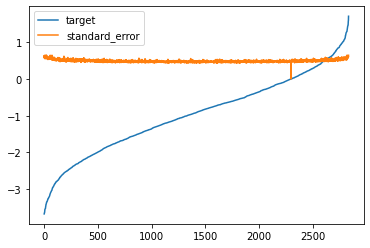

In [14]:
(
    train_df[["target", "standard_error"]]
        .sort_values(by="target")
        .reset_index(drop=True)
        .plot()
) ; None

In [24]:
train_df.target.describe()

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64

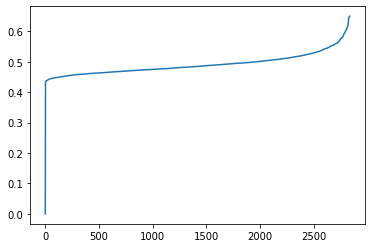

In [17]:
(
    train_df.standard_error
        .sort_values()
        .reset_index(drop=True)
        .plot()
) ; None

In [23]:
train_df.standard_error.describe()

count    2834.000000
mean        0.491435
std         0.034818
min         0.000000
25%         0.468543
50%         0.484721
75%         0.506268
max         0.649671
Name: standard_error, dtype: float64

In [22]:
train_df.excerpt.str.len().describe()

count    2834.000000
mean      971.732886
std       117.257578
min       669.000000
25%       885.000000
50%       971.000000
75%      1058.000000
max      1341.000000
Name: excerpt, dtype: float64

The competition uses mean squared error as the evaluation metric, where a lower score is better.
I think that the standard error on the target values will place a lower bound on the achievable score.
Unfortunately my statistics knowledge is not sufficient to be able to determine what that is.